In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Salary_dataset.csv')

## Check Data

In [3]:
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


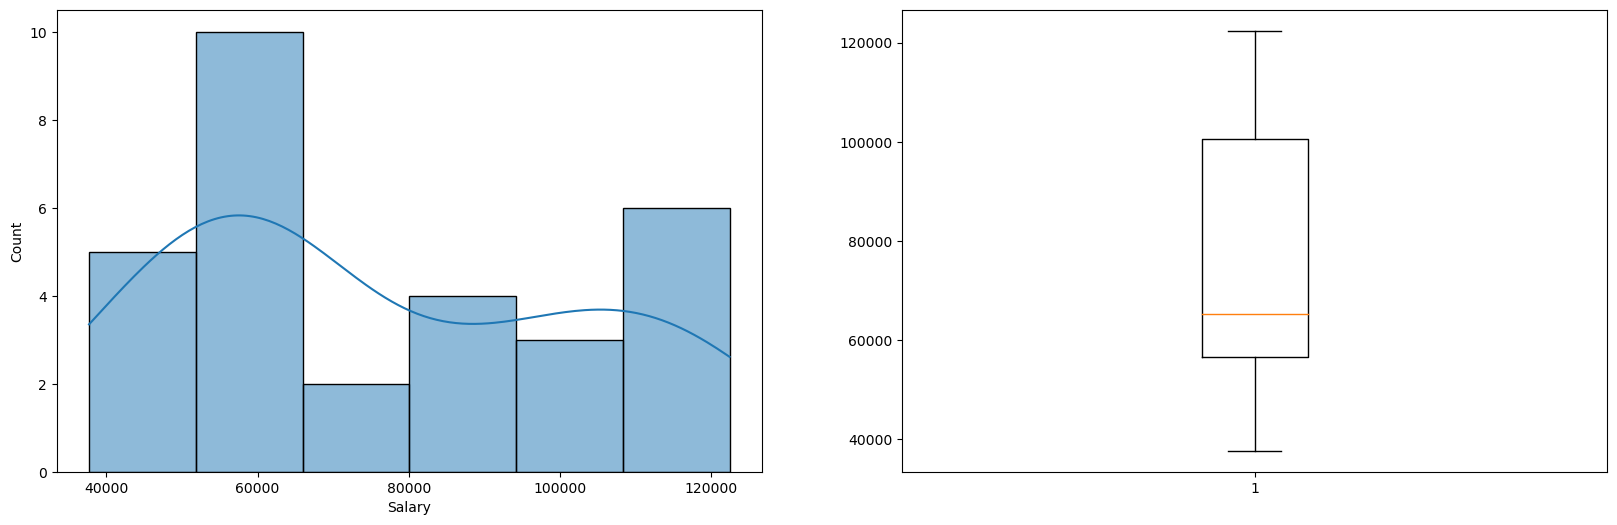

Salary Skew: 0.35411967922959153


In [7]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
sns.histplot(data=df,x='Salary',kde=True,ax=axs[0])
axs[1].boxplot(data=df,x='Salary')
plt.show()

print('Salary Skew:',df['Salary'].skew())

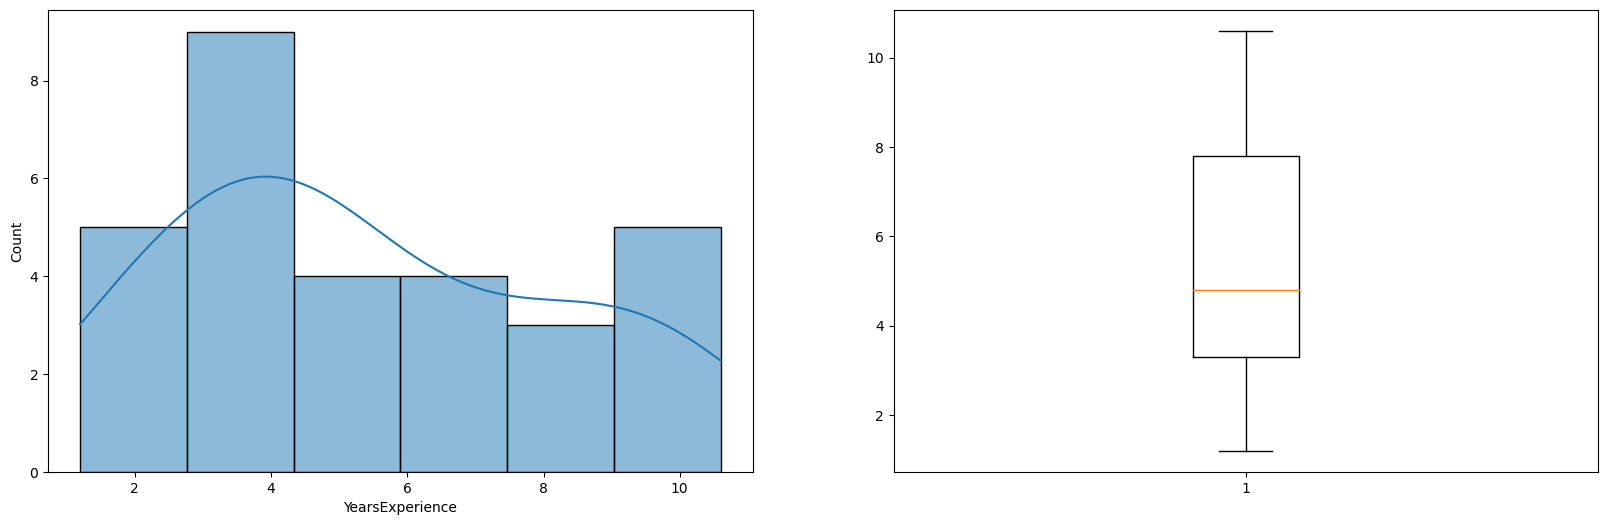

Years Experience Skew: 0.37956024064804234


In [8]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
sns.histplot(data=df,x='YearsExperience',kde=True,ax=axs[0])
axs[1].boxplot(data=df,x='YearsExperience')
plt.show()

print('Years Experience Skew:',df['YearsExperience'].skew())


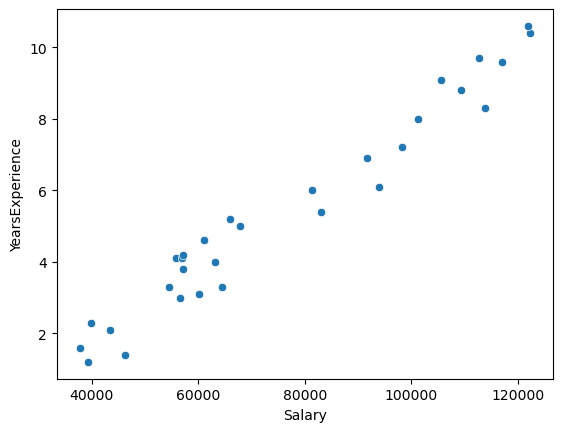

In [9]:
sns.scatterplot(x='Salary',y='YearsExperience',data=df)
plt.show()

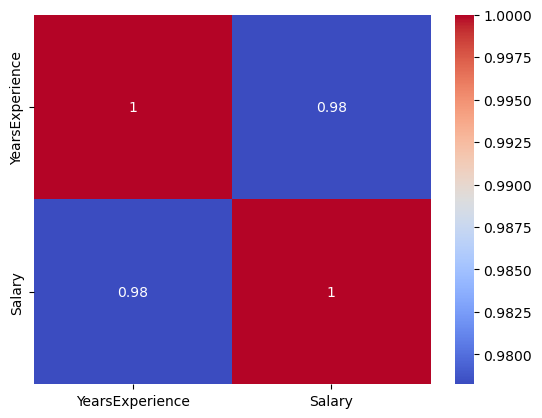

In [10]:
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.show()

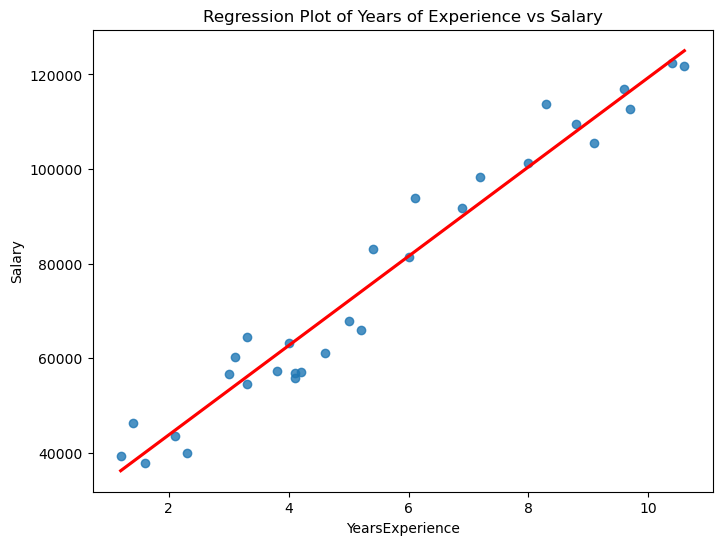

In [11]:
plt.figure(figsize=(8, 6))
sns.regplot(x='YearsExperience', y='Salary', data=df, ci=None, line_kws={"color": "red"})
plt.title('Regression Plot of Years of Experience vs Salary')
plt.show()

### Insights

●There are a strong positive correaltion between two columns

●Salary and Years explerience column have right skewness

## Modeling

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import matplotlib.pyplot as plt

In [13]:
X = df[['YearsExperience']]
y = df['Salary']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [14]:
ln = LinearRegression()

ln.fit(X_train, y_train)


In [15]:
ln.intercept_

25032.68718594055

In [16]:
ln.coef_

array([9608.88153483])

In [17]:
y_pred = ln.predict(X_test)

In [18]:
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

final=[]
final.append({
        "MAE": mae,
        "MSE":mse,
        "RMSE":rmse,
        "R² Score": r2
    })

finalresult = pd.DataFrame(final)
finalresult

,MAE,MSE,RMSE,R² Score
0,6151.718876,4.251027e+07,6519.989836,0.925049


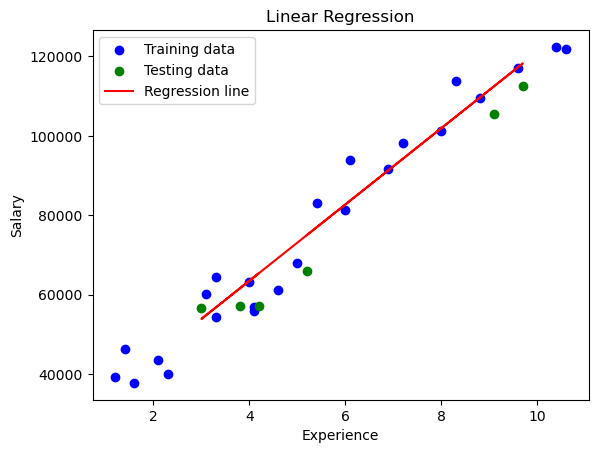

In [19]:
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Testing data')
plt.plot(X_test, y_pred, color='red', label='Regression line')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Linear Regression')
plt.legend()
plt.show()

## Summary

The R² score of 0.92 indicates that 92% of the variance in the salary can be explained by the linear relationship with years of experience. This suggests a very strong correlation between the two variables.